# Mini project

### netid: sy671

In [1]:
import pandas_profiling as pp
import pandas as pd 
import numpy as np 
from collections import defaultdict
import os
import re
import jieba
import bs4
import hashlib
import os
import traceback
import uuid
import time
import re
import codecs
import os
import random
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
# from community import community_louvain
from sklearn import preprocessing 
# from pyecharts import configure

# IDE
After importing the data, we need to have an overview of the overall structure and samples of the data, for example, the size of the data, how many columns there are, what format each column is in, whether it contains null, etc.


In [2]:
df01 = pd.read_csv("Dataset_Contract_Sub-Awards.csv")

In [3]:
'''
View the number of rows and columns of data
Through the attribute shape, get the (number of rows, number of columns) of the dataset
'''
print(df01.shape)


(348, 105)


In [4]:
print(list(df01.columns))

['prime_award_unique_key', 'prime_award_piid', 'prime_award_parent_piid', 'prime_award_amount', 'prime_award_disaster_emergency_fund_codes', 'prime_award_outlayed_amount_funded_by_COVID-19_supplementals', 'prime_award_obligated_amount_funded_by_COVID-19_supplementals', 'prime_award_base_action_date', 'prime_award_base_action_date_fiscal_year', 'prime_award_latest_action_date', 'prime_award_latest_action_date_fiscal_year', 'prime_award_period_of_performance_start_date', 'prime_award_period_of_performance_current_end_date', 'prime_award_period_of_performance_potential_end_date', 'prime_award_awarding_agency_code', 'prime_award_awarding_agency_name', 'prime_award_awarding_sub_agency_code', 'prime_award_awarding_sub_agency_name', 'prime_award_awarding_office_code', 'prime_award_awarding_office_name', 'prime_award_funding_agency_code', 'prime_award_funding_agency_name', 'prime_award_funding_sub_agency_code', 'prime_award_funding_sub_agency_name', 'prime_award_funding_office_code', 'prime_aw

In [5]:
df01.head(5)

prime_award_unique_key prime_award_piid  \
0  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   
1  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   
2  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   
3  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   
4  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   

   prime_award_parent_piid  prime_award_amount  \
0                      NaN           174746702   
1                      NaN           174746702   
2                      NaN           174746702   
3                      NaN           174746702   
4                      NaN           174746702   

  prime_award_disaster_emergency_fund_codes  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   prime_award_outlayed_amount_funded_by_COVID-19_supplementals  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   prime_award_obligated_amount_funded_by_COVID-19_supplementals  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               

  prime_award_base_action_date  prime_award_base_action_date_fiscal_year  \
0                   2016/10/31                                      2017   
1                   2016/10/31                                      2017   
2                   2016/10/31                                      2017   
3                   2016/10/31                                      2017   
4                   2016/10/31                                      2017   

  prime_award_latest_action_date  ...  \
0                      2021/9/15  ...   
1                      2021/9/15  ...   
2                      2021/9/15  ...   
3                      2021/9/15  ...   
4                      2021/9/15  ...   

   subawardee_highly_compensated_officer_1_amount.1  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  subawardee_highly_compensated_officer_2_amount  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  subawardee_highly_compensated_officer_3_name  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  subawardee_highly_compensated_officer_3_amount  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   subawardee_highly_compensated_officer_4_name  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                 

In [6]:
#  Repeated Value Observation and Handling
df01[df01.duplicated()]

prime_award_unique_key prime_award_piid  \
318  CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-    HR001117C0025   

     prime_award_parent_piid  prime_award_amount  \
318                      NaN           174746702   

             prime_award_disaster_emergency_fund_codes  \
318  N: Emergency P.L. 116-136;Q: Excluded from tra...   

     prime_award_outlayed_amount_funded_by_COVID-19_supplementals  \
318                                                NaN              

     prime_award_obligated_amount_funded_by_COVID-19_supplementals  \
318                                          1105080.5               

    prime_award_base_action_date  prime_award_base_action_date_fiscal_year  \
318                   2016/10/31                                      2017   

    prime_award_latest_action_date  ...  \
318                      2021/9/15  ...   

     subawardee_highly_compensated_officer_1_amount.1  \
318                                               NaN   

    subawardee_highly_compensated_officer_2_amount  \
318                                            NaN   

    subawardee_highly_compensated_officer_3_name  \
318                                          NaN   

    subawardee_highly_compensated_officer_3_amount  \
318                                            NaN   

     subawardee_highly_compensated_officer_4_name  \
318                                           NaN   

    subawardee_highly_compensated_officer_4_amount  \
318                                            NaN   

    subawardee_highly_compensated_officer_5_name  \
318                                          NaN   

    subawardee_highly_compensated_officer_5_amount  \
318                                            NaN   

                                 usaspending_permalink  \
318  https://www.usaspending.gov/award/CONT_AWD_HR0...   

    subaward_fsrs_report_last_modified_date  
318                  2020-07-13 15:47:50+00  

[1 rows x 105 columns]

In [7]:
df01.drop_duplicates(inplace=True)

# Data cleaning and feature processing


In [8]:
# Empty rate calculation
col_null_dict = dict(df01.isnull().sum())
cols01 = []
for k in col_null_dict.keys():
    if col_null_dict[k]<300 and len([item for item in list(set(df01[k])) if len(str(item))>1])>1:
        cols01.append(k)

In [9]:
col_null_dict

{'prime_award_unique_key': 0,
 'prime_award_piid': 0,
 'prime_award_parent_piid': 347,
 'prime_award_amount': 0,
 'prime_award_disaster_emergency_fund_codes': 329,
 'prime_award_outlayed_amount_funded_by_COVID-19_supplementals': 347,
 'prime_award_obligated_amount_funded_by_COVID-19_supplementals': 329,
 'prime_award_base_action_date': 0,
 'prime_award_base_action_date_fiscal_year': 0,
 'prime_award_latest_action_date': 0,
 'prime_award_latest_action_date_fiscal_year': 0,
 'prime_award_period_of_performance_start_date': 0,
 'prime_award_period_of_performance_current_end_date': 0,
 'prime_award_period_of_performance_potential_end_date': 0,
 'prime_award_awarding_agency_code': 0,
 'prime_award_awarding_agency_name': 0,
 'prime_award_awarding_sub_agency_code': 0,
 'prime_award_awarding_sub_agency_name': 0,
 'prime_award_awarding_office_code': 0,
 'prime_award_awarding_office_name': 0,
 'prime_award_funding_agency_code': 0,
 'prime_award_funding_agency_name': 0,
 'prime_award_funding_sub_a

In [10]:
cols01

['prime_award_awarding_sub_agency_code',
 'prime_award_awarding_sub_agency_name',
 'prime_award_awarding_office_code',
 'prime_award_awarding_office_name',
 'prime_award_funding_sub_agency_code',
 'prime_award_funding_sub_agency_name',
 'prime_award_funding_office_code',
 'prime_award_funding_office_name',
 'prime_awardee_dba_name',
 'prime_awardee_parent_duns',
 'prime_awardee_parent_name',
 'prime_awardee_business_types',
 'prime_award_primary_place_of_performance_city_name',
 'prime_award_primary_place_of_performance_address_zip_code',
 'prime_award_project_title',
 'subaward_fsrs_report_id',
 'subaward_fsrs_report_year',
 'subaward_fsrs_report_month',
 'subaward_number',
 'subaward_amount',
 'subaward_action_date',
 'subaward_action_date_fiscal_year',
 'subawardee_duns',
 'subawardee_name',
 'subawardee_dba_name',
 'subawardee_parent_duns',
 'subawardee_parent_name',
 'subawardee_address_line_1',
 'subawardee_city_name',
 'subawardee_state_code',
 'subawardee_state_name',
 'subawar

In [11]:
# To view the type of each column, the attribute dtypes of the dataframe can return a list representing the data name and type of each column:
number_cols = [] #Numeric variable
object_cols = []
cat_cols = [] #Categorical variables
dict_type = dict(df01.dtypes)
for k in dict_type.keys():
    if k not in cols01:continue
    if len([item for item in list(set(df01[k])) if len(str(item))>1])<10:
        cat_cols.append(k)
    elif 'int' in str(dict_type[k]) or 'float' in str(dict_type[k]):
        number_cols.append(k)
    else:
        object_cols.append(k)

In [12]:
print(number_cols)

['subaward_amount', 'subawardee_duns', 'subawardee_parent_duns', 'subawardee_zip_code', 'subawardee_congressional_district', 'subaward_primary_place_of_performance_address_zip_code']


In [13]:
# Get the statistical characteristics of each column of data (eg: total number of rows, mean, standard deviation of column data, etc.)
# Use: dataframe.describe() to view the data of each column
'''
(1) Count the total number of rows
(2) Average mean
(3) Standard deviation std
(4) Minimum value min
(5) 25% quantile value "25%"
(6) 50% quantile value "50%"
(7) 75% quantile value "75%"
(8) Maximum value max
'''
df01[number_cols].describe()

subaward_amount  subawardee_duns  subawardee_parent_duns  \
count     3.470000e+02     3.470000e+02            2.430000e+02   
mean      1.885573e+06     3.199250e+08            2.573970e+08   
std       8.345702e+06     3.574805e+08            3.178479e+08   
min       2.557900e+04     2.742497e+06            1.024314e+06   
25%       6.264500e+04     3.972646e+07            8.642098e+06   
50%       1.204500e+05     8.469247e+07            8.019874e+07   
75%       3.384840e+05     7.806810e+08            4.852038e+08   
max       6.269682e+07     9.637092e+08            9.673561e+08   

       subawardee_zip_code  subawardee_congressional_district  \
count         3.470000e+02                         347.000000   
mean          5.687379e+08                          11.766571   
std           3.298024e+08                          13.416633   
min           6.480100e+04                           1.000000   
25%           2.192148e+08                           3.500000   
50%           6.480138e+08                           7.000000   
75%           8.571068e+08                          13.000000   
max           9.775614e+08                          52.000000   

       subaward_primary_place_of_performance_address_zip_code  
count                                       3.470000e+02       
mean                                        5.831788e+08       
std                                         3.198294e+08       
min                                         1.434564e+07       
25%                                         2.366616e+08       
50%                                         6.480138e+08       
75%                                         8.571067e+08       
max                                         9.775614e+08

# Visual Analysis

The variable subawardee_highly_compensated_officer_1_name is the name of the individual identified as one of the five highest paid "executives". "Administrator" means an officer, managing partner or any other employee who holds a management position for a sub-recipient.

In [14]:
p01 = df01.groupby('subawardee_highly_compensated_officer_1_name')['prime_award_unique_key'].count().reset_index()
p01.columns = ['subawardee_highly_compensated_officer_1_name','subawardee_count']
p01

subawardee_highly_compensated_officer_1_name  subawardee_count
0  80% of Cobham's annual revenue for the fiscal ...                 2
1                                    Alice  Eldridge                 1
2                                    Brendan M Walsh                 5
3                                        David  King                 1
4                                    David  Robinson                 2
5                                     Gordon  Walker                 3
6                                     John E Hammond                 1
7                                   Louise J Elliott                 2
8                                    Richard  Hunter                 3
9                                    Steven  Perkins                 1

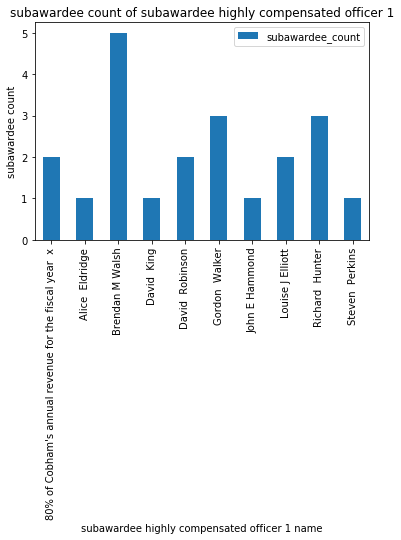

In [15]:
# p01.plot.bar(x='subawardee_highly_compensated_officer_1_name',y='subawardee_count')
p01.plot.bar(x='subawardee_highly_compensated_officer_1_name',y='subawardee_count')
plt.xlabel('subawardee highly compensated officer 1 name') 
plt.ylabel('subawardee count') 
plt.title("subawardee count of subawardee highly compensated officer 1")
plt.savefig("pre2.png",bbox_inches = 'tight')
plt.show()

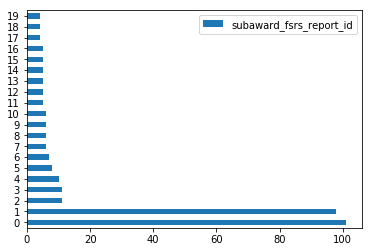

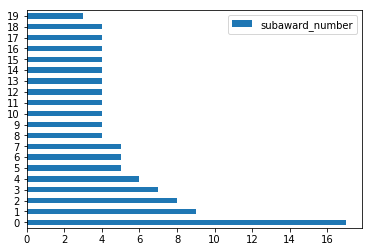

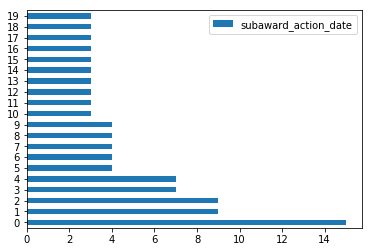

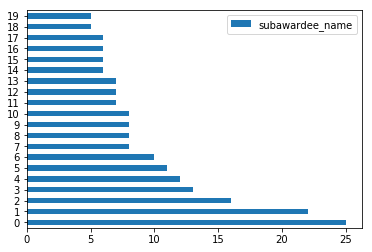

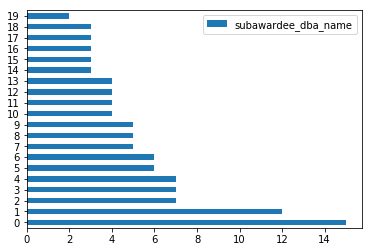

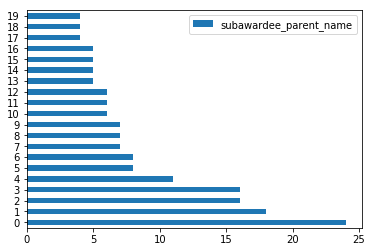

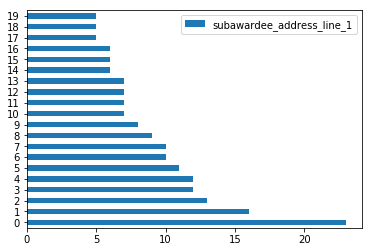

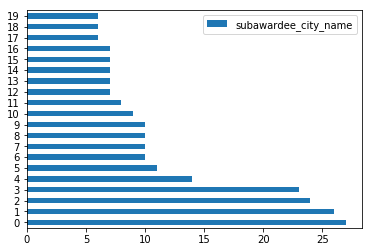

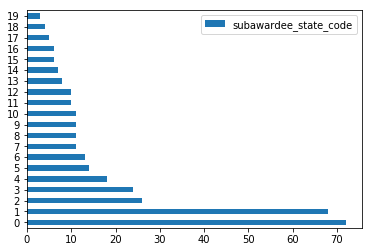

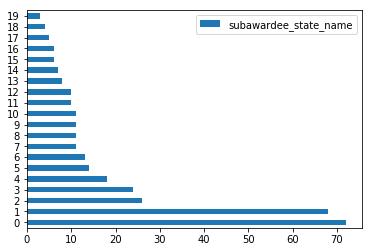

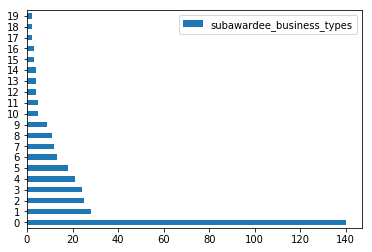

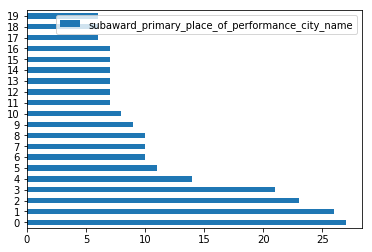

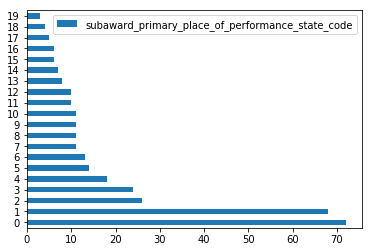

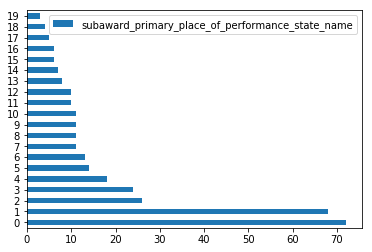

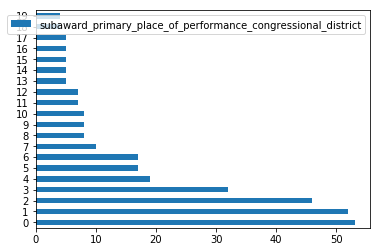

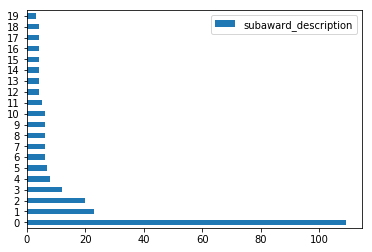

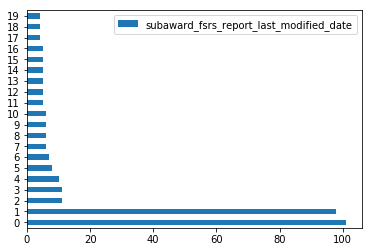

In [16]:
for col in object_cols:
    df01[col].value_counts().reset_index()[:20].plot(kind='barh')

In [17]:
p01 = df01.groupby('subawardee_highly_compensated_officer_3_name')['subawardee_highly_compensated_officer_3_amount'].sum().reset_index()
p01.columns = ['subawardee_highly_compensated_officer_3_name','subawardee_amount_sum']
p01

subawardee_highly_compensated_officer_3_name  subawardee_amount_sum
0                            Chris  Huntington              1336863.0
1                                 Daniel  Link              1658891.0
2                               Meryl  Mallery               415647.0
3                               Michael  Moody               394143.0
4                                     N/A  N/A                    0.0
5                           Robert W Wentworth               660000.0
6                               Ronald  Nowlin               993789.0
7                           Thomas  Arseneault              2853284.0
8    consolidated basis.  As a consolidated  x                    2.0

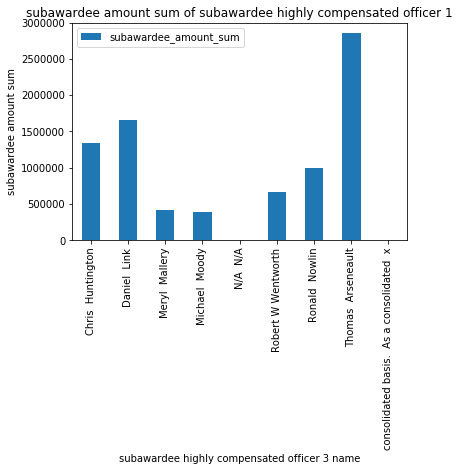

In [18]:
p01.plot.bar(x='subawardee_highly_compensated_officer_3_name',y='subawardee_amount_sum')
plt.xlabel('subawardee highly compensated officer 3 name') 
plt.ylabel('subawardee amount sum') 
plt.title("subawardee amount sum of subawardee highly compensated officer 1")
plt.savefig("pre3.png",bbox_inches = 'tight')
plt.show()

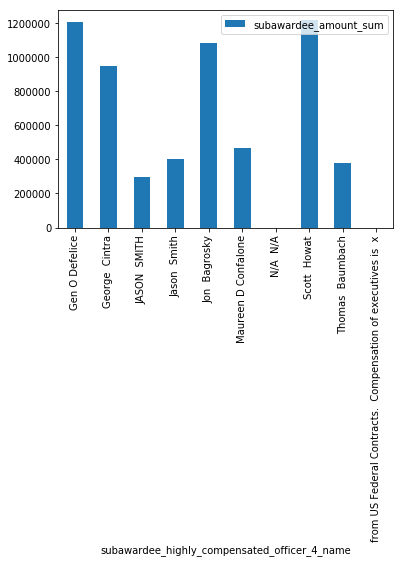

In [19]:
p01 = df01.groupby('subawardee_highly_compensated_officer_4_name')['subawardee_highly_compensated_officer_4_amount'].sum().reset_index()
p01.columns = ['subawardee_highly_compensated_officer_4_name','subawardee_amount_sum']
p01.plot.bar(x='subawardee_highly_compensated_officer_4_name',y='subawardee_amount_sum')
plt.savefig("pre4.png",bbox_inches = 'tight')

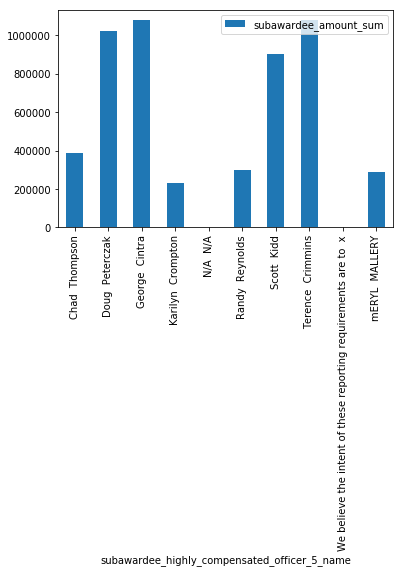

In [20]:
p01 = df01.groupby('subawardee_highly_compensated_officer_5_name')['subawardee_highly_compensated_officer_5_amount'].sum().reset_index()
p01.columns = ['subawardee_highly_compensated_officer_5_name','subawardee_amount_sum']
p01.plot.bar(x='subawardee_highly_compensated_officer_5_name',y='subawardee_amount_sum')
plt.savefig("pre5.png",bbox_inches = 'tight')

## Correlation analysis

In [21]:
df01[cols01].corr()

prime_awardee_parent_duns  \
prime_awardee_parent_duns                                            1.000000   
prime_award_primary_place_of_performance_addres...                   0.941599   
subaward_fsrs_report_year                                            0.900935   
subaward_fsrs_report_month                                           0.608144   
subaward_amount                                                     -0.144564   
subaward_action_date_fiscal_year                                     0.318384   
subawardee_duns                                                     -0.041976   
subawardee_parent_duns                                               0.005050   
subawardee_zip_code                                                  0.100827   
subawardee_congressional_district                                    0.005515   
subaward_primary_place_of_performance_address_z...                   0.085635   

                                                    prime_award_primary_place_of_performance_address_zip_code  \
prime_awardee_parent_duns                                                                    0.941599           
prime_award_primary_place_of_performance_addres...                                           1.000000           
subaward_fsrs_report_year                                                                    0.906396           
subaward_fsrs_report_month                                                                   0.564505           
subaward_amount                                                                             -0.133322           
subaward_action_date_fiscal_year                                                             0.368275           
subawardee_duns                                                                             -0.026908           
subawardee_parent_duns                                                                       0.050497           
subawardee_zip_code                                                                          0.097610           
subawardee_congressional_district                                                           -0.003560           
subaward_primary_place_of_performance_address_z...                                           0.079411           

                                                    subaward_fsrs_report_year  \
prime_awardee_parent_duns                                            0.900935   
prime_award_primary_place_of_performance_addres...                   0.906396   
subaward_fsrs_report_year                                            1.000000   
subaward_fsrs_report_month                                           0.462569   
subaward_amount                                                     -0.131750   
subaward_action_date_fiscal_year                                     0.425994   
subawardee_duns                                                     -0.048228   
subawardee_parent_duns                                               0.004352   
subawardee_zip_code                                                  0.090295   
subawardee_congressional_district                                   -0.011929   
subaward_primary_place_of_performance_address_z...                   0.076336   

                                                    subaward_fsrs_report_month  \
prime_awardee_parent_duns                                             0.608144   
prime_award_primary_place_of_performance_addres...                    0.564505   
subaward_fsrs_report_year                                             0.462569   
subaward_fsrs_report_month                                            1.000000   
subaward_amount                                                      -0.166992   
subaward_action_date_fiscal_year                                      0.173943   
subawardee_duns                                                      -0.023098   
subawardee_parent_duns                                               -0.066207   
subawardee_

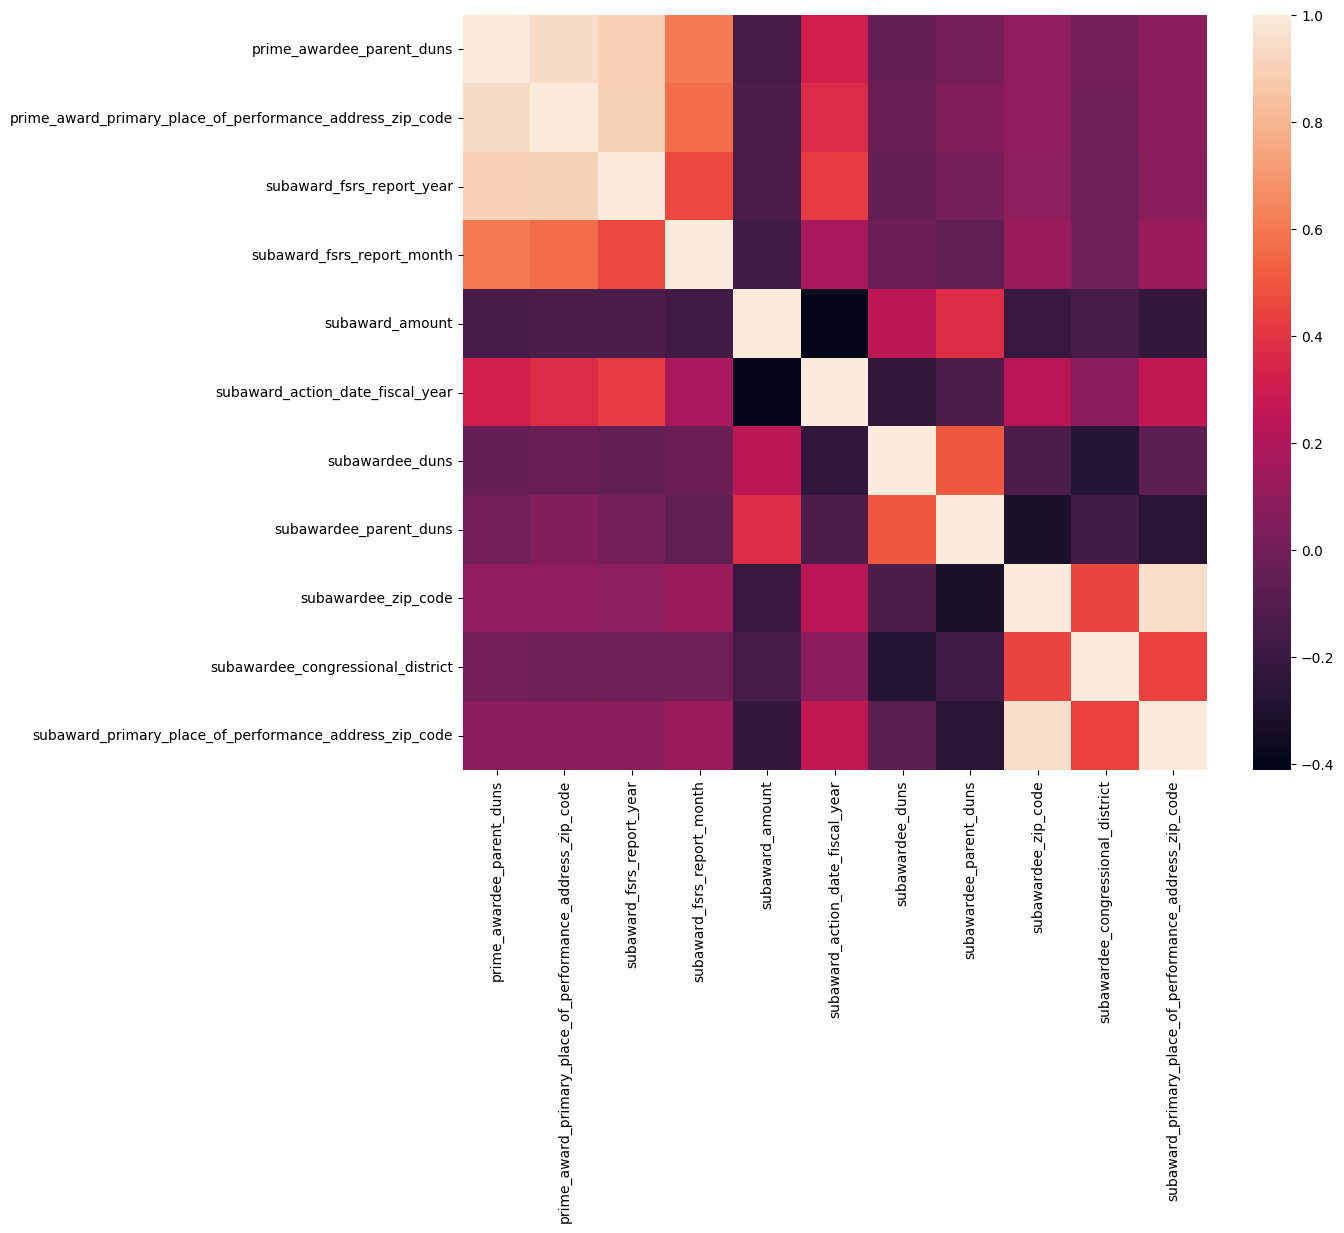

In [22]:
plt.figure(dpi=100, figsize=(12, 10))
sns.heatmap(df01[cols01].corr())
plt.savefig("pre6.png",bbox_inches = 'tight')
plt.show()

# interactive visualization

In [24]:
# !python -m pip install --user plotly 

In [25]:
# !/mnt/miniconda/bin/pip uninstall plotly && python -m pip install plotly -Y -Y

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
 

In [26]:
col01 = ['subaward_action_date','subaward_amount']
import plotly.express as px

fig =px.line(df01[col01].sort_values(by='subaward_action_date',ascending=True),x='subaward_action_date',y='subaward_amount')
fig.show()
fig.write_html("subaward_amount_date01.html")

In [27]:
col01 = ['subaward_fsrs_report_month','subaward_amount']
import plotly.express as px

fig =px.line(df01[col01].sort_values(by='subaward_fsrs_report_month',ascending=True),x='subaward_fsrs_report_month',y='subaward_amount')
fig.show()
fig.write_html("subaward_fsrs_report_month.html")

subaward_action_date_fiscal_year The fiscal year of the subaward ActionDate. Note that the federal fiscal year begins on October 1 and ends on September 30, so October 1, 2018 is the first day of fiscal year 2019.

In [81]:
col01 = ['subaward_action_date_fiscal_year','subaward_amount']
import plotly.express as px

fig =px.line(df01[col01].sort_values(by='subaward_action_date_fiscal_year',ascending=True),x='subaward_action_date_fiscal_year',y='subaward_amount')
fig.show()
fig.write_html("subaward_action_date_fiscal_year.html")

subawardee_name The name of the subawardee recipient associated with the subawardee recipient's unique identifier. For companies headquartered in the United States, the name is the name that the business would normally file on individual state filings (if required)

In [83]:
col01 = ['subawardee_name','subaward_amount']
import plotly.express as px

fig =px.bar(df01[col01].sort_values(by='subawardee_name',ascending=True),x='subawardee_name',y='subaward_amount')
fig.show()
fig.write_html("subawardee_name.html")

subawardee_dba_name The business name of the contractor's address.

In [84]:
col01 = ['subawardee_dba_name','subaward_amount']
import plotly.express as px

fig =px.bar(df01[col01].sort_values(by='subawardee_dba_name',ascending=True),x='subawardee_dba_name',y='subaward_amount')
fig.show()
fig.write_html("subawardee_dba_name.html")

## Sankey
A Sankey diagram usually depicts the flow of data from one entity (or node) to another entity (or node).

Many times we need a situation where we have to visualize how data flows between entities. For example, consider how residents move from one country to another. Here is a demonstration of how many residents migrated from England to Northern Ireland, Scotland and Wales.
The entity to which the data flows is called a node, the node where the data flow originates is the source node (eg England on the left), and the node where the flow ends is the destination node (eg Wales on the right). Source and destination nodes are usually represented as rectangles with labels.

Sankey diagrams can be used to represent the flow of energy, money, costs, and anything that has a concept of flow.

In [26]:
p005 = df01.groupby(['subawardee_state_name','subawardee_dba_name'])['subaward_amount'].sum().reset_index()
p005.columns = ['source','target','values']
p005

source                                     target     values
0         Arizona                                AMT AMERICA     154000
1         Arizona                            ANEWCO PRODUCTS     572257
2         Arizona                                       JASC    4046599
3         Arizona                   LAUNCH VEHICLES DIVISION   17051884
4         Arizona                        MERIT MANUFACTURING     401760
5         Arizona             TRIUMPH FABRICATIONS - PHOENIX      87531
6      California                L-3 TELEMETRY & RF PRODUCTS    3233807
7      California                                        M C     770396
8      California                          MARVIN GROUP, THE    1174630
9      California                         PACIFIC SCIENTIFIC    3367659
10     California                         PCC Aerostructures     101361
11     California                  SPACE COMPONENTS DIVISION     385946
12    Connecticut                                      EBA&D    9999774
13           Iowa  BAE SYSTEMS NAVIGATION AND SENSOR SYSTEMS      90200
14           Iowa                         GOVERNMENT SYSTEMS      57400
15       Maryland  TACTICAL PROPULSION AND CONTROLS DIVISION  428805895
16  Massachusetts          GAS TURBINE FUEL SYSTEMS DIVISION    1691109
17      Minnesota                                  HONEYWELL     210573
18       New York                                IMI SENSORS     123836
19           Ohio                                    Element      93274
20           Ohio                               GLOBE MOTORS      46830
21           Ohio                                   Quasonix     198975
22         Oregon                              PCC SCHLOSSER    1193104
23   Pennsylvania                                      C T C      73854
24   Pennsylvania                                        CTC     138894
25   Pennsylvania                                       JADE     595704
26   Pennsylvania                 L3 TELEMETRY & RF PRODUCTS      82290
27   Pennsylvania                   ULTRA ELECTRONICS HERLEY     977772
28      Tennessee                                 Microtherm      96373
29       Virginia                            TE Connectivity    1003860

In [27]:
nodes = []

for i in range(2):
    values = p005.iloc[:,i].unique()
    for value in values:
        dic = {}
        dic['name'] = value
        nodes.append(dic)

nodes

[{'name': 'Arizona'},
 {'name': 'California'},
 {'name': 'Connecticut'},
 {'name': 'Iowa'},
 {'name': 'Maryland'},
 {'name': 'Massachusetts'},
 {'name': 'Minnesota'},
 {'name': 'New York'},
 {'name': 'Ohio'},
 {'name': 'Oregon'},
 {'name': 'Pennsylvania'},
 {'name': 'Tennessee'},
 {'name': 'Virginia'},
 {'name': 'AMT AMERICA'},
 {'name': 'ANEWCO PRODUCTS'},
 {'name': 'JASC'},
 {'name': 'LAUNCH VEHICLES DIVISION'},
 {'name': 'MERIT MANUFACTURING'},
 {'name': 'TRIUMPH FABRICATIONS - PHOENIX'},
 {'name': 'L-3 TELEMETRY & RF PRODUCTS'},
 {'name': 'M C'},
 {'name': 'MARVIN GROUP, THE'},
 {'name': 'PACIFIC SCIENTIFIC'},
 {'name': 'PCC Aerostructures'},
 {'name': 'SPACE COMPONENTS DIVISION'},
 {'name': 'EBA&D'},
 {'name': 'BAE SYSTEMS NAVIGATION AND SENSOR SYSTEMS'},
 {'name': 'GOVERNMENT SYSTEMS'},
 {'name': 'TACTICAL PROPULSION AND CONTROLS DIVISION'},
 {'name': 'GAS TURBINE FUEL SYSTEMS DIVISION'},
 {'name': 'HONEYWELL'},
 {'name': 'IMI SENSORS'},
 {'name': 'Element'},
 {'name': 'GLOBE MOT

In [28]:
linkes = []

for i in p005.values:
    dic = {}
    dic['source'] = i[0]
    dic['target'] = i[1]
    dic['value'] = i[2]
    linkes.append(dic)

linkes

[{'source': 'Arizona', 'target': 'AMT AMERICA', 'value': 154000},
 {'source': 'Arizona', 'target': 'ANEWCO PRODUCTS', 'value': 572257},
 {'source': 'Arizona', 'target': 'JASC', 'value': 4046599},
 {'source': 'Arizona',
  'target': 'LAUNCH VEHICLES DIVISION',
  'value': 17051884},
 {'source': 'Arizona', 'target': 'MERIT MANUFACTURING', 'value': 401760},
 {'source': 'Arizona',
  'target': 'TRIUMPH FABRICATIONS - PHOENIX',
  'value': 87531},
 {'source': 'California',
  'target': 'L-3 TELEMETRY & RF PRODUCTS',
  'value': 3233807},
 {'source': 'California', 'target': 'M C', 'value': 770396},
 {'source': 'California', 'target': 'MARVIN GROUP, THE', 'value': 1174630},
 {'source': 'California', 'target': 'PACIFIC SCIENTIFIC', 'value': 3367659},
 {'source': 'California', 'target': 'PCC Aerostructures', 'value': 101361},
 {'source': 'California',
  'target': 'SPACE COMPONENTS DIVISION',
  'value': 385946},
 {'source': 'Connecticut', 'target': 'EBA&D', 'value': 9999774},
 {'source': 'Iowa',
  'ta

In [29]:
from pyecharts.charts import Sankey
from pyecharts import options as opts

pic = (
    Sankey( init_opts=opts.InitOpts(
        width='1800px',
        height='2000px'
    ))
    .add('subawardee_dba_name',  
         nodes,
         linkes,
         
         pos_top='20%',
         pos_left='10%',
         linestyle_opt=opts.LineStyleOpts(opacity =0.3, curve = 0.5, color = "source"),
         
         label_opts=opts.LabelOpts(position="left"),
         
         node_gap = 30,
    )
    .set_global_opts(title_opts=opts.TitleOpts(title = 'subawardee_state_name'))
) 
pic.render("subawardee_state_name_Sankey.html")

'/home/hadoop/subawardee_state_name_Sankey.html'

# network analysis

From the data, we know that prime_award_awarding_agency_name refers to the Ministry of Defense. Now let's find the network relationship of the following variables: prime_award_awarding_sub_agency_name, prime_award_awarding_office_name, prime_award_funding_agency_name, prime_award_funding_sub_agency_name, prime_award_funding_office_name, prime_award_project_title.

And the relationship between the Raytheon company corresponding to prime_awardee_name and the following variables: prime_awardee_business_types, subawardee_name, subawardee_parent_name, subawardee_business_types, subaward_description

In [30]:
g1 = nx.MultiDiGraph()
g2 = nx.MultiDiGraph()
def fun02(x):
    g1.add_edge(x['prime_award_awarding_sub_agency_name'], x['prime_award_awarding_agency_name'])
    g1.add_edge(x['prime_award_awarding_office_name'], x['prime_award_awarding_agency_name'])
    g1.add_edge(x['prime_award_funding_agency_name'], x['prime_award_awarding_agency_name'])
    g1.add_edge(x['prime_award_funding_office_name'], x['prime_award_awarding_agency_name'])
    
    g2.add_edge(x['prime_awardee_business_types'], x['prime_awardee_name'])
    g2.add_edge(x['subawardee_name'], x['prime_awardee_name'])
    g2.add_edge(x['subawardee_parent_name'], x['prime_awardee_name'])
    g2.add_edge(x['subawardee_business_types'], x['prime_awardee_name'])
    g2.add_edge(x['subaward_description'], x['prime_awardee_name'])
t01 = df01.T.apply(lambda x:fun02(dict(x)))

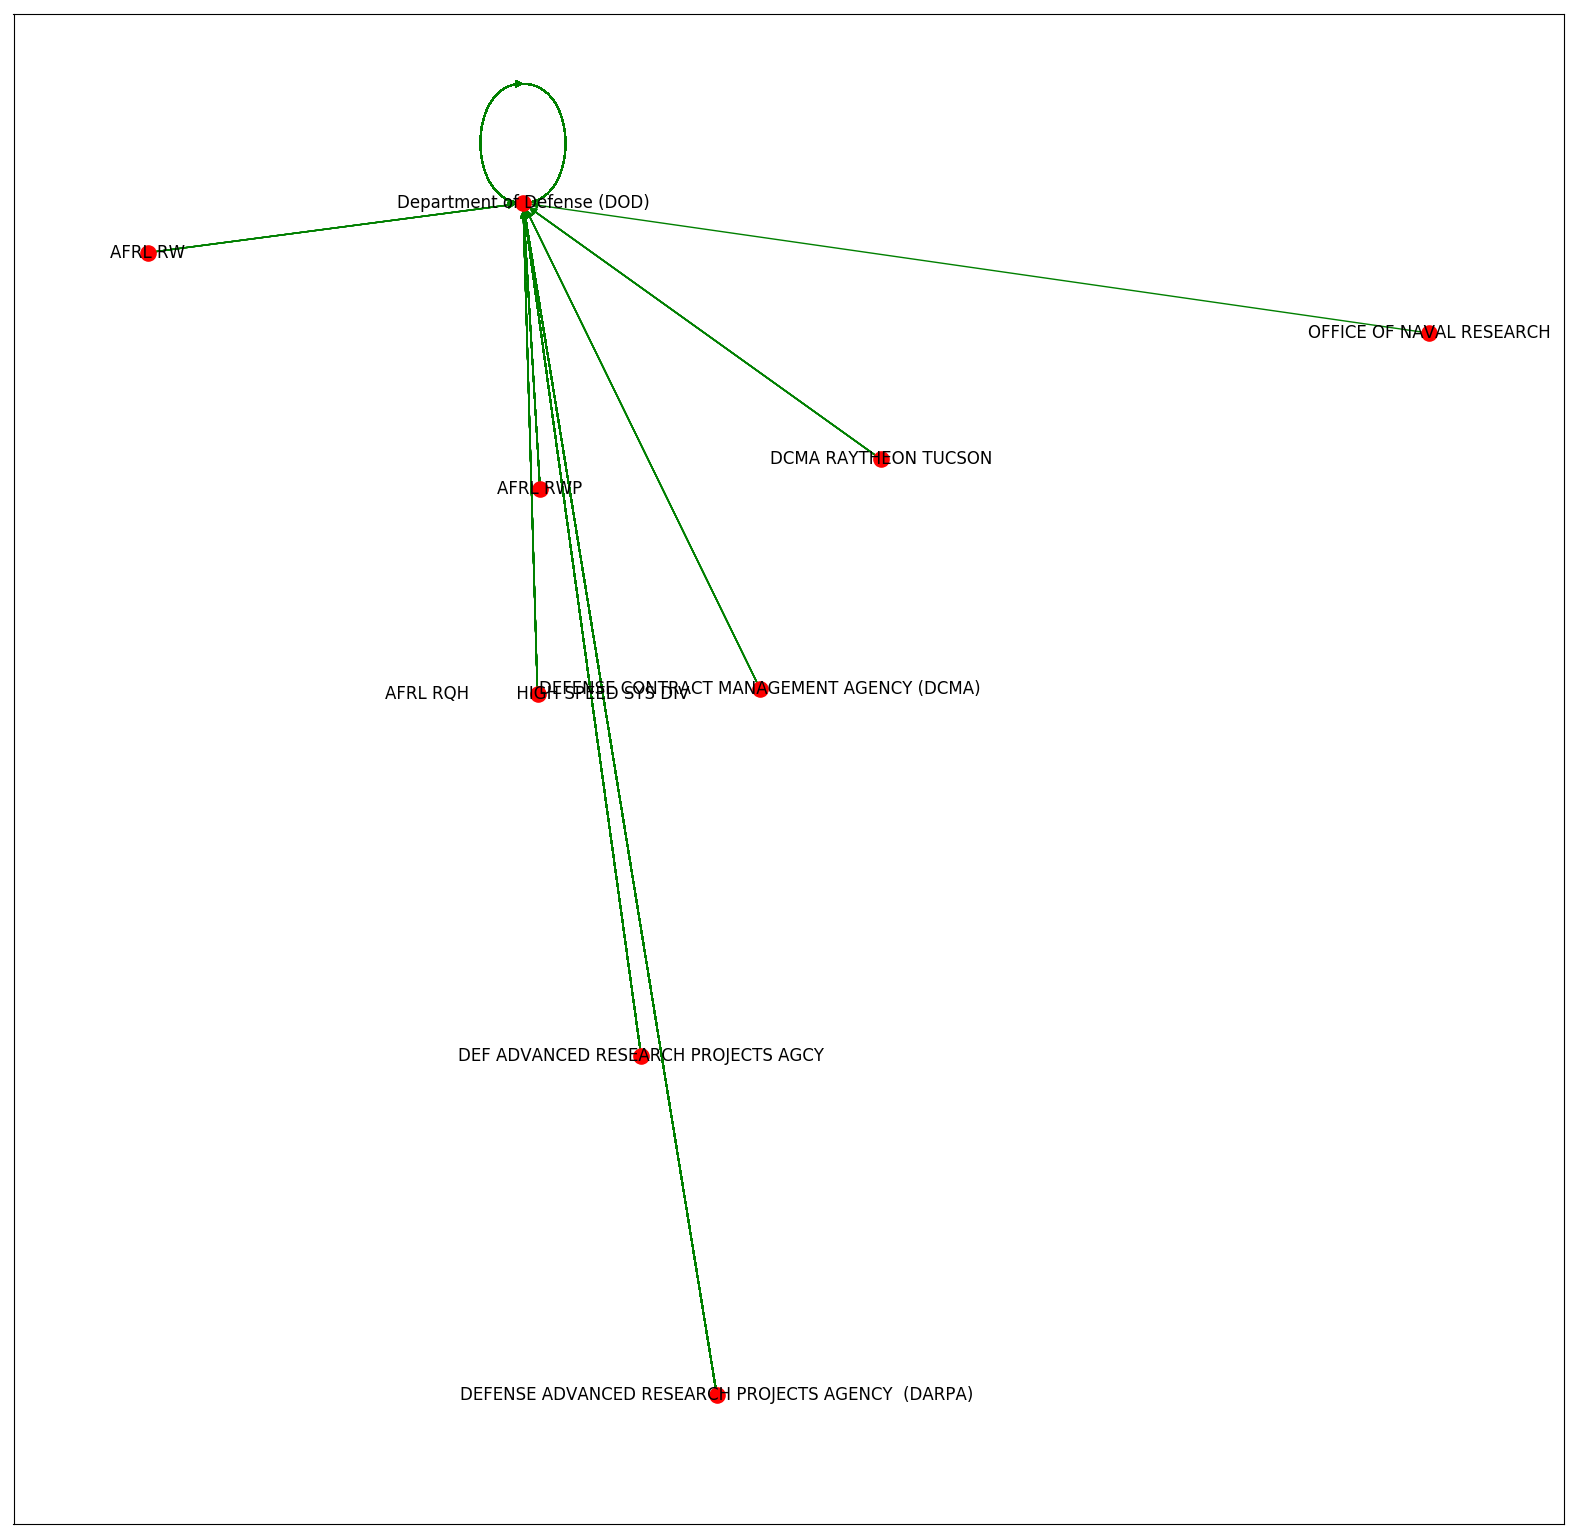

In [31]:
# prime_award_awarding_agency_name 
BLUE = "#99CCFF"
plt.figure(dpi=100, figsize=(20, 20))
nx.draw_networkx(g1, width=1, with_labels=True,  font_size=12, node_size=120, node_color="r",
                 edge_color="g")
plt.savefig( 'net_prime_award_awarding_agency_name.png',  dpi=100)
plt.show()

In [41]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import networkx as nx
import networkx 
import matplotlib.pyplot as plt

In [37]:
#Choose a title!
title = 'Network of prime_award_awarding_agency_name'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

In [43]:
#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(g1, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
save(plot, filename=f"net1.html")

/mnt/miniconda/lib/python3.7/site-packages/bokeh/io/saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/mnt/miniconda/lib/python3.7/site-packages/bokeh/io/saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/home/hadoop/net1.html'

In [44]:
# ! pip install --upgrade setuptools
# ! pip install pyviz
# ! python -m pip install -U pip setuptools

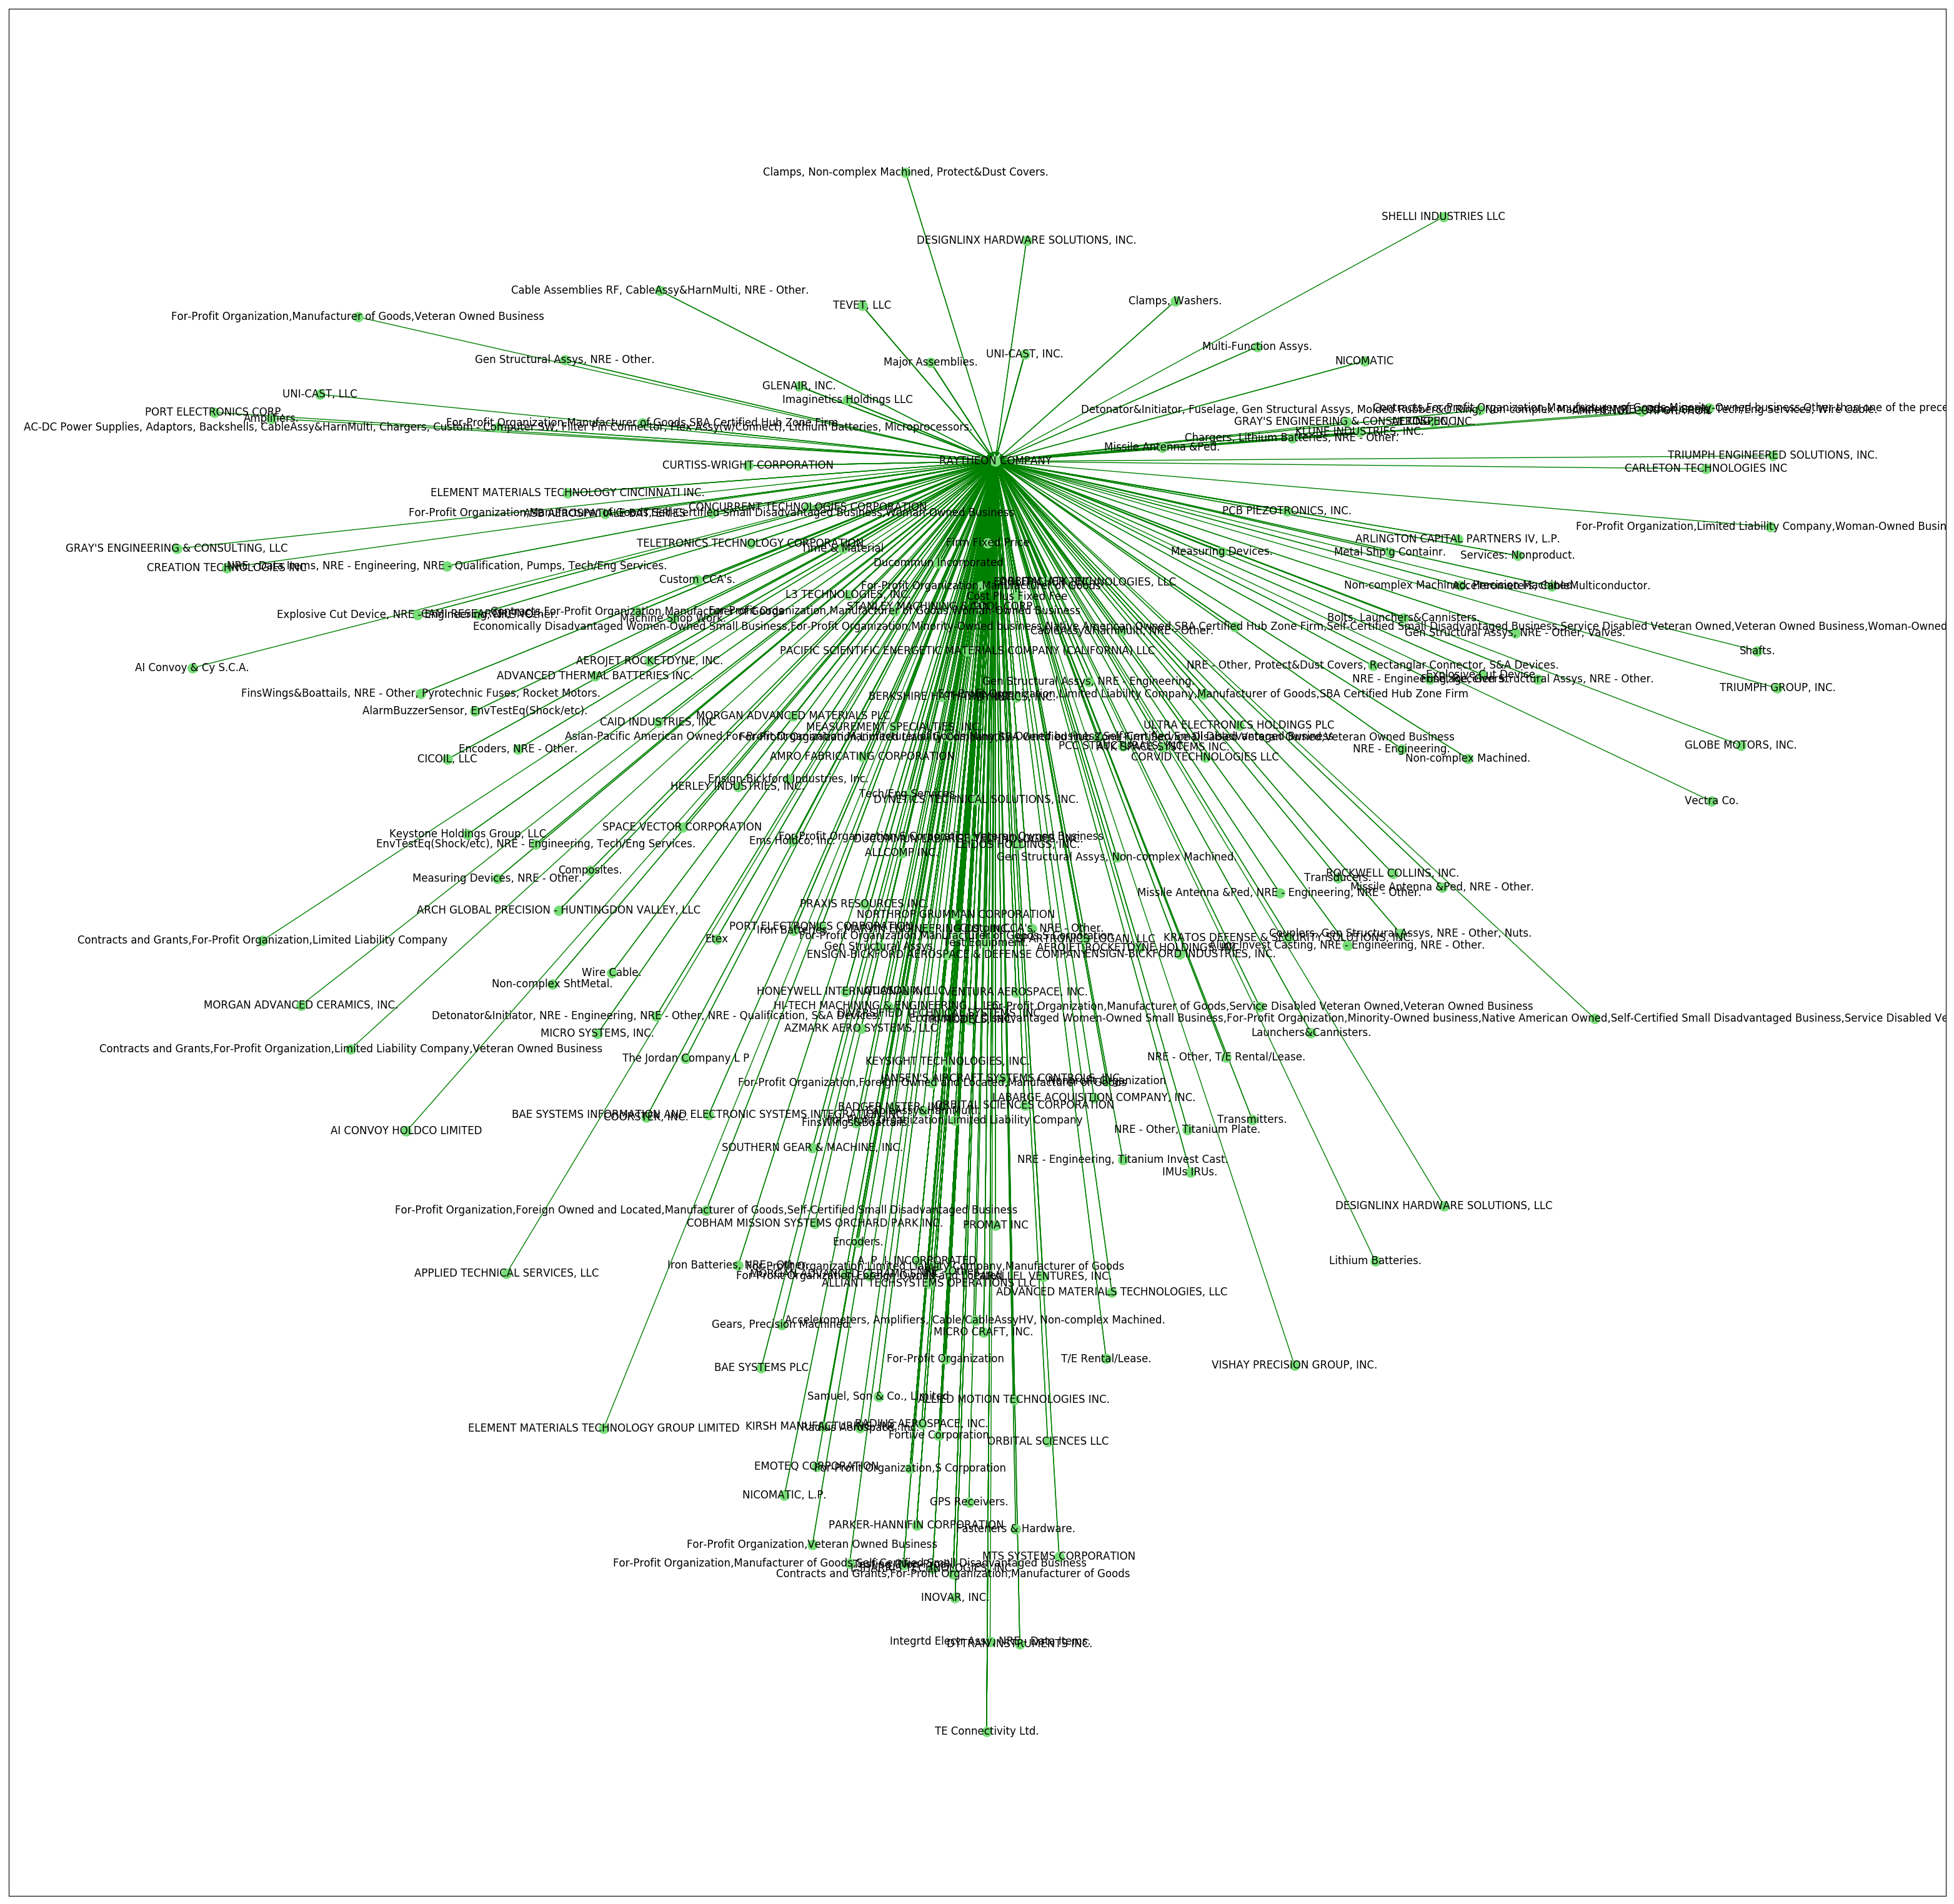

In [45]:
# prime_award_awarding_agency_name
GREEN = "#77DD77"
plt.figure(dpi=100, figsize=(40, 40))
nx.draw_networkx(g2, width=1, with_labels=True,  font_size=12, node_size=120, node_color=GREEN,
                 edge_color="g")
plt.savefig('net_prime_awardee_name.png',  dpi=100)
plt.show()

In [47]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [48]:
degrees = dict(networkx.degree(g2))
networkx.set_node_attributes(g2, name='degree', values=degrees)

In [50]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(g2)])
networkx.set_node_attributes(g2, name='adjusted_node_size', values=adjusted_node_size)

In [52]:
# #Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
# size_by_this_attribute = 'adjusted_node_size'
# color_by_this_attribute = 'adjusted_node_size'

# #Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
# color_palette = Blues8

# #Choose a title!
# title = 'Network of prime_awardee_name'

# #Establish which categories will appear when hovering over each node
# HOVER_TOOLTIPS = [
#        ("Character", "@index"),
#         ("Degree", "@degree")
# ]

# #Create a plot — set dimensions, toolbar, and title
# plot = figure(tooltips = HOVER_TOOLTIPS,
#               tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
#             x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

# #Create a network graph object
# # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
# network_graph = from_networkx(g2, networkx.spring_layout, scale=10, center=(0, 0))

# #Set node sizes and colors according to node degree (color as spectrum of color palette)
# minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
# maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
# network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

# #Set edge opacity and width
# network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

# plot.renderers.append(network_graph)

# show(plot)
# save(plot, filename=f"net2.html")

# nlp
subaward_description A brief description of the purpose of the award.

In [53]:
def load(filename):
    import pickle
    try:
        if os.path.isfile(filename):
            with open(filename, 'rb') as infile:
                obj = pickle.load(infile)
                return obj
    except:
        traceback.print_exc()
    return {}
eng_stopwords_path01 ="eng_stopwords.pkl"
eng_stopwords = load(eng_stopwords_path01)

In [54]:
print(len(eng_stopwords))

891


In [55]:
import re
def regexp_replace(string1):
    string1 = str(string1)
    if len(string1)<2: return ""
    cop = re.compile(r"[^a-z^A-Z^0-9]") 
    string1 = cop.sub(' ', string1)
    return string1.replace('^',' ')


In [56]:
df01['subaward_description'] = df01['subaward_description'].map(regexp_replace)

In [57]:
def fun_cut01(x):
    words = list(jieba.cut(x, cut_all=True))
    return [w for w in words if not w in eng_stopwords and len(w)>1] 

df01['words_token'] = df01['subaward_description'].map(fun_cut01)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.741 seconds.
Prefix dict has been built successfully.


In [58]:
df01['id'] = df01.index

In [59]:
words_token_list = [fun_cut01(text01) for text01 in list(df01['subaward_description'])]
len(words_token_list)

347

In [60]:
df_w01 = df01[['id','subaward_action_date','subaward_amount','subaward_description','words_token']].explode('words_token')
df_w01

id subaward_action_date  subaward_amount  \
0      0             2016/9/6         62696821   
0      0             2016/9/6         62696821   
0      0             2016/9/6         62696821   
0      0             2016/9/6         62696821   
0      0             2016/9/6         62696821   
..   ...                  ...              ...   
346  346            2019/1/31            25579   
346  346            2019/1/31            25579   
347  347            2019/1/31            25579   
347  347            2019/1/31            25579   
347  347            2019/1/31            25579   

                                  subaward_description words_token  
0    Detonator Initiator  Fuselage  Gen Structural ...   Detonator  
0    Detonator Initiator  Fuselage  Gen Structural ...   Initiator  
0    Detonator Initiator  Fuselage  Gen Structural ...    Fuselage  
0    Detonator Initiator  Fuselage  Gen Structural ...         Gen  
0    Detonator Initiator  Fuselage  Gen Structural ...  Structural  
..                                                 ...         ...  
346                                   Firm Fixed Price       Fixed  
346                                   Firm Fixed Price       Price  
347                                   Firm Fixed Price        Firm  
347                                   Firm Fixed Price       Fixed  
347                                   Firm Fixed Price       Price  

[1216 rows x 5 columns]

## TF_IDF

In [61]:
# tf word frequency
word_tf = df_w01.groupby(['id', 'words_token'])['subaward_description'].count().reset_index()
word_tf.columns = ['id', 'words_token','n_w']
word_tf01 = df_w01.groupby('id')['words_token'].count().reset_index()
word_tf01.columns = ['id','n_d']
word_tf = word_tf.merge(word_tf01,on='id',how='left')
word_tf['tf'] = word_tf['n_w']/word_tf['n_d']
word_tf.sort_values(by='tf',ascending=False)

id      words_token  n_w  n_d        tf
1102  327         Encoders    1    1  1.000000
1166  335       Amplifiers    1    1  1.000000
1103  328         Encoders    1    1  1.000000
1089  321       Composites    1    1  1.000000
1088  320       Composites    1    1  1.000000
...   ...              ...  ...  ...       ...
1143  333               SW    1   21  0.047619
1142  333            Power    1   21  0.047619
1141  333              Pin    1   21  0.047619
1140  333  Microprocessors    1   21  0.047619
1137  333             Flex    1   21  0.047619

[1200 rows x 5 columns]

In [62]:
c_d = df01.shape[0]
c_d

347

In [63]:
# idf
word_idf = df_w01.groupby(['id','words_token'])['subaward_description'].count().reset_index()
word_idf.columns = ['id','words_token','i_d']
word_idf['c_d'] = c_d
word_idf['idf'] = np.log(c_d/(word_idf['i_d']+1))
word_idf.sort_values(by='idf',ascending=False)

id words_token  i_d  c_d       idf
0      0       Assys    1  347  5.156178
804  219       Fixed    1  347  5.156178
802  218       Other    1  347  5.156178
801  218         NRE    1  347  5.156178
800  218   HarnMulti    1  347  5.156178
..   ...         ...  ...  ...       ...
484  118         NRE    2  347  4.750712
123   22         NRE    3  347  4.463030
264   55         NRE    3  347  4.463030
355   77         NRE    3  347  4.463030
116   21         NRE    3  347  4.463030

[1200 rows x 5 columns]

In [64]:
df_w02 = word_tf.merge(word_idf[['words_token', 'i_d', 'c_d', 'idf']],on='words_token',how='left')
df_w02['tfidf'] = df_w02['tf']*df_w02['idf']
df_w02 = df_w02.drop_duplicates().sort_values(by='tfidf',ascending=False)
df_w02

id  words_token  n_w  n_d    tf  i_d  c_d       idf     tfidf
58804  321   Composites    1    1  1.00    1  347  5.156178  5.156178
59542  328     Encoders    1    1  1.00    1  347  5.156178  5.156178
29578  143  Transducers    1    1  1.00    1  347  5.156178  5.156178
58387  311     Encoders    1    1  1.00    1  347  5.156178  5.156178
58393  312     Encoders    1    1  1.00    1  347  5.156178  5.156178
...    ...          ...  ...  ...   ...  ...  ...       ...       ...
114      0          NRE    1   20  0.05    2  347  4.750712  0.237536
96       0     Machined    1   20  0.05    2  347  4.750712  0.237536
475      1          NRE    1   20  0.05    2  347  4.750712  0.237536
108      0          NRE    1   20  0.05    3  347  4.463030  0.223152
469      1          NRE    1   20  0.05    3  347  4.463030  0.223152

[1392 rows x 9 columns]

## wordcloud

In [69]:
import wordcloud as wc
import matplotlib.pyplot as plt
# from scipy.misc import imread
from imageio import imread
from PIL import Image
def Cloud_words(s,words):
    cloud = wc.WordCloud(background_color='white',
                          max_font_size=100, 
                          max_words=2000, 
                         )
    plt.figure(dpi=100, figsize=(10, 8))
    mywc = cloud.generate(words)
    plt.imshow(mywc)
    mywc.to_file(str(s)+'.png')

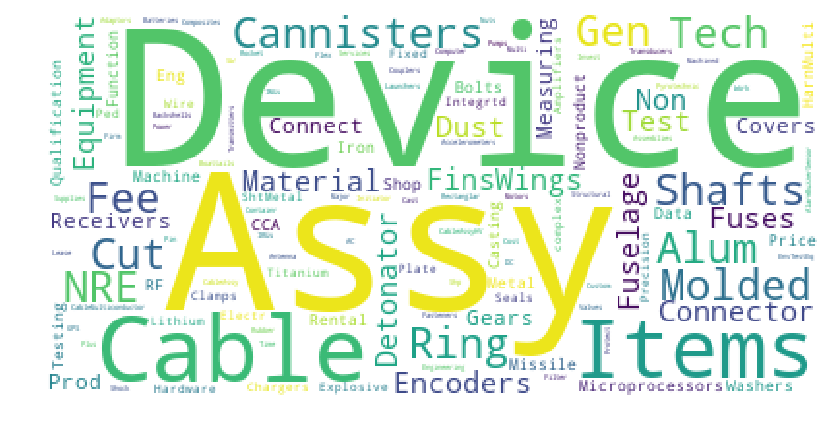

In [74]:
words = " ".join(list(set(df_w02['words_token'])))
Cloud_words("tf_idf_cloud",words)
plt.axis('off')
plt.show()

# Thematic Analysis
## LDA topic model
Document topic generation model (Latent Dirichlet Allocation, LDA for short). The specific implementation steps of the LDA model are as follows:

1. A topic z corresponding to each word is extracted from the multinomial distribution θ corresponding to each webpage D.
2. Draw a word w from the multinomial distribution φ corresponding to topic z.
3. Steps 1 and 2 are repeated for a total of Nd times until each word in the web page is traversed.

 ## Generate word frequency matrix

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  

corpus = list(df01['subaward_description'])
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus) 
word = vectorizer.get_feature_names()
print('number of features:', len(word)) 

print(X.toarray())

number of features: 130
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/mnt/miniconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
# !pip install lda --user

     |████████████████████████████████| 351 kB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 14.7 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [85]:
import lda
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import sklearn.discriminant_analysis
# from sklearn.lda import LDA
import sklearn
sklearn.__version__
# from sklearn.qda import QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)  
model.fit(X)          
model.fit_transform(X) 

INFO:lda:n_documents: 347
INFO:lda:vocab_size: 130
INFO:lda:n_words: 1220
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -9100
INFO:lda:<10> log likelihood: -4920
INFO:lda:<20> log likelihood: -4675
INFO:lda:<30> log likelihood: -4679
INFO:lda:<40> log likelihood: -4671
INFO:lda:<50> log likelihood: -4656
INFO:lda:<60> log likelihood: -4660
INFO:lda:<70> log likelihood: -4658
INFO:lda:<80> log likelihood: -4648
INFO:lda:<90> log likelihood: -4643
INFO:lda:<100> log likelihood: -4646
INFO:lda:<110> log likelihood: -4620
INFO:lda:<120> log likelihood: -4658
INFO:lda:<130> log likelihood: -4686
INFO:lda:<140> log likelihood: -4629
INFO:lda:<150> log likelihood: -4651
INFO:lda:<160> log likelihood: -4635
INFO:lda:<170> log likelihood: -4635
INFO:lda:<180> log likelihood: -4642
INFO:lda:<190> log likelihood: -4632
INFO:lda:<200> log likelihood: -4646
INFO:lda:<210> log likelihood: -4640
INFO:lda:<220> log likelihood: -4665
INFO:lda:<230> log likelihood: -4638
INFO:ld

array([[0.00487805, 0.73658537, 0.00487805, 0.24878049, 0.00487805],
       [0.00487805, 0.73658537, 0.00487805, 0.24878049, 0.00487805],
       [0.02222222, 0.02222222, 0.02222222, 0.91111111, 0.02222222],
       ...,
       [0.02857143, 0.02857143, 0.88571429, 0.02857143, 0.02857143],
       [0.02857143, 0.02857143, 0.88571429, 0.02857143, 0.02857143],
       [0.02857143, 0.02857143, 0.88571429, 0.02857143, 0.02857143]])

# Top-N of topic keywords
The following explains how to calculate the common words included in each topic, that is, to calculate the topic-word (Topic-Word) distribution. The following code is used to count the five words with the highest word frequency in each topic 5, namely Top-5.

In [86]:
#Topic-Word Distribution
word = vectorizer.get_feature_names()
topic_word = model.topic_word_  
n=5
for i, topic_dist in enumerate(topic_word):    
    topic_words = np.array(word)[np.argsort(topic_dist)][:-(n+1):-1]    
    print(u'*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

*Topic 0
- other nre custom batteries cca
*Topic 1
- nre assys structural gen engineering
*Topic 2
- fixed price firm time material
*Topic 3
- plus cost fixed fee non
*Topic 4
- nre other cableassy harnmulti devices


shape: (347, 5)
Document: 1 Topic: 1
Document: 2 Topic: 1
Document: 3 Topic: 3
Document: 4 Topic: 3
Document: 5 Topic: 3
Document: 6 Topic: 3
Document: 7 Topic: 3
Document: 8 Topic: 3
Document: 9 Topic: 3


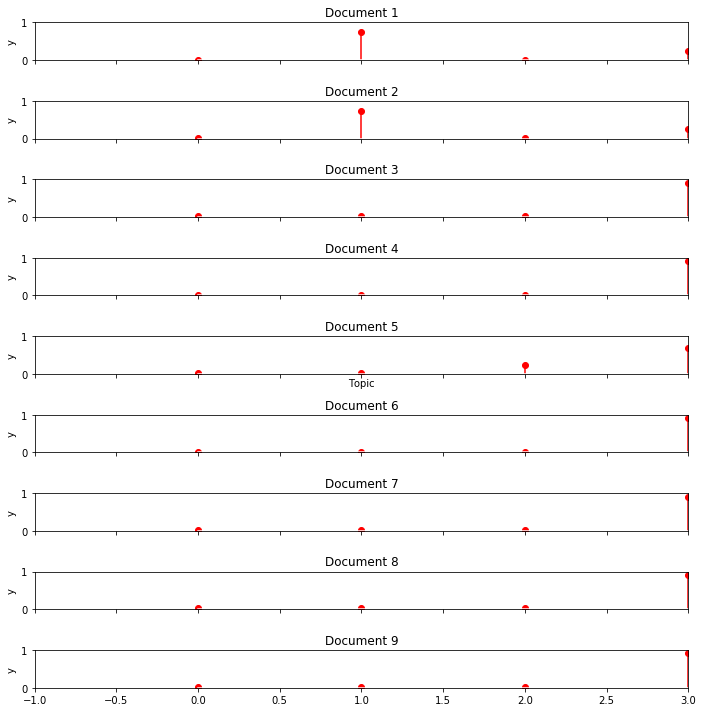

In [87]:
##Topic-Word Distribution
doc_topic = model.doc_topic_
print("shape: {}".format(doc_topic.shape))  
for n in range(9):  
    topic_most_pr = doc_topic[n].argmax()  
    print("Document: {} Topic: {}".format(n+1,topic_most_pr))
    
#viz
import matplotlib.pyplot as plt  
f, ax= plt.subplots(9, 1, figsize=(10, 10), sharex=True)  
for i, k in enumerate([0,1,2,3,4,5,6,7,8]):  
    ax[i].stem(doc_topic[k,:], linefmt='r-',  
               markerfmt='ro', basefmt='w-')  
    ax[i].set_xlim(-1, 3)      #3 topic
    ax[i].set_ylim(0, 1.0)     
    ax[i].set_ylabel("y")  
    ax[i].set_title("Document {}".format(k+1))  
ax[4].set_xlabel("Topic")  
plt.tight_layout()
plt.savefig("result.png")
plt.show() 

# ML
Predict subaward_amount by regression analysis

In [88]:
sns.pairplot(df01, x_vars=['prime_award_primary_place_of_performance_city_name','subaward_action_date_fiscal_year','subawardee_state_code'], y_vars='subaward_amount', size=7, aspect=0.8)
plt.savefig('ML-1.png',transparent = True)

C:\jupyter notebook\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



In [89]:
print(number_cols)

['subaward_amount', 'subawardee_duns', 'subawardee_parent_duns', 'subawardee_zip_code', 'subawardee_congressional_district', 'subaward_primary_place_of_performance_address_zip_code']


In [90]:
plt.figure(dpi=80, figsize=(12, 10))
sns.heatmap(df01[number_cols].corr())
df01[number_cols].corr()
plt.savefig('ML-2.1.png',transparent = True)

In [91]:
number_cols

['subaward_amount',
 'subawardee_duns',
 'subawardee_parent_duns',
 'subawardee_zip_code',
 'subawardee_congressional_district',
 'subaward_primary_place_of_performance_address_zip_code']

In [92]:
cat_cols

['prime_award_awarding_sub_agency_code',
 'prime_award_awarding_sub_agency_name',
 'prime_award_awarding_office_code',
 'prime_award_awarding_office_name',
 'prime_award_funding_sub_agency_code',
 'prime_award_funding_sub_agency_name',
 'prime_award_funding_office_code',
 'prime_award_funding_office_name',
 'prime_awardee_dba_name',
 'prime_awardee_parent_duns',
 'prime_awardee_parent_name',
 'prime_awardee_business_types',
 'prime_award_primary_place_of_performance_city_name',
 'prime_award_primary_place_of_performance_address_zip_code',
 'prime_award_project_title',
 'subaward_fsrs_report_year',
 'subaward_fsrs_report_month',
 'subaward_action_date_fiscal_year']

In [93]:
df_ftr01 = pd.get_dummies(df01[cat_cols], prefix='hot_', prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True)

In [94]:
col03 = [col for col in df_ftr01.columns if 'hot_' in col]

In [95]:
df_ftr02 = pd.concat([df_ftr01[col03],df01[['subawardee_duns', 'subawardee_parent_duns','subawardee_zip_code', 'subawardee_congressional_district', 'subaward_primary_place_of_performance_address_zip_code']]], axis=1)
df_ftr02

hot__97AE  hot__97AE  hot__DEFENSE CONTRACT MANAGEMENT AGENCY (DCMA)  \
0            1          1                                               0   
1            1          1                                               0   
2            1          0                                               0   
3            1          0                                               0   
4            1          1                                               0   
..         ...        ...                                             ...   
343          1          0                                               0   
344          1          1                                               0   
345          1          0                                               0   
346          1          0                                               0   
347          1          0                                               0   

     hot__S0305A  hot__DEF ADVANCED RESEARCH PROJECTS AGCY  \
0              0                                         1   
1              0                                         1   
2              0                                         1   
3              0                                         1   
4              0                                         1   
..           ...                                       ...   
343            0                                         1   
344            0                                         1   
345            0                                         1   
346            0                                         1   
347            0                                         1   

     hot__DEF ADVANCED RESEARCH PROJECTS AGCY  hot__5700  hot__97AE  \
0                                           1          0          1   
1                                           1          0          1   
2                                           0          1          1   
3                                           0          1          1   
4                                           1          0          1   
..                                        ...        ...        ...   
343                                         0          1          1   
344                                         1          0          1   
345                                         0          1          1   
346                                         0          1          1   
347                                         0          1          1   

     hot__97AE  hot__DEPT OF THE AIR FORCE  ...  \
0            1                           0  ...   
1            1                           0  ...   
2            0                           1  ...   
3            0                           1  ...   
4            1                           0  ...   
..         ...                         ...  ...   
343          0                           1  ...   
344          1                           0  ...   
345          0                           1  ...   
346          0                           1  ...   
347          0                           1  ...   

     hot__AMS: ADV PROGRAMS/RMS: NBI  hot__AMS: ADV PROGRAMS; AMS:AAWS  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
..                               ...                               ...   
343                                0                                 0   
344                                0                                 0   
345                                1                                 0   
346                                1                                 0   
347                                1                   

In [114]:
plt.figure(dpi=80, figsize=(12, 10))
sns.heatmap(df_ftr02.corr())

df_ftr02.corr()
plt.savefig('ML-2.png',transparent = True)

In [98]:
feature_cols = list(df_ftr02.columns)

In [99]:
df01['subaward_amount'].describe()

count    3.470000e+02
mean     1.885573e+06
std      8.345702e+06
min      2.557900e+04
25%      6.264500e+04
50%      1.204500e+05
75%      3.384840e+05
max      6.269682e+07
Name: subaward_amount, dtype: float64

In [100]:
X = df_ftr02.fillna(-0.0001)
Y = np.log(df01['subaward_amount']) 


In [101]:
from sklearn.model_selection import train_test_split
X=preprocessing.StandardScaler().fit_transform(X) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=2021, train_size=0.9)

In [102]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(312, 34) (35, 34) (312,) (35,)


In [103]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

In [104]:
list(zip(feature_cols, linreg.coef_))

[('hot__97AE', 14460512948677.104),
 ('hot__97AE', 4072812128615.961),
 ('hot__DEFENSE CONTRACT MANAGEMENT AGENCY (DCMA)', 17562575735517.146),
 ('hot__S0305A', -8944339023579.512),
 ('hot__DEF ADVANCED RESEARCH PROJECTS AGCY', 4396111545061.8193),
 ('hot__DEF ADVANCED RESEARCH PROJECTS AGCY', -17147992077584.205),
 ('hot__5700', -13272844068533.463),
 ('hot__97AE', -7979534033209.053),
 ('hot__97AE', -1501379078565.524),
 ('hot__DEPT OF THE AIR FORCE', -21626243851899.855),
 ('hot__DEPT OF THE NAVY', -2410006579632.278),
 ('hot__F1TBPV', 16013244851876.533),
 ('hot__F4FRQH', -24522577577036.29),
 ('hot__HR0011', -16805660928853.102),
 ('hot__N00014', -5475234519326.547),
 ('hot__AFRL RW', -11550648629949.527),
 ('hot__AFRL RWP', -48133889162557.27),
 ('hot__DEF ADVANCED RESEARCH PROJECTS AGCY', -2258853748592.317),
 ('hot__DEF ADVANCED RESEARCH PROJECTS AGCY', -42480919190323.95),
 ('hot__OFFICE OF NAVAL RESEARCH', 1993890896292.8857),
 ('hot__RAYTHEON COMPANY', -1232023591148.7346),


In [105]:
y_pred = linreg.predict(x_test)

In [106]:
len(y_pred)

35

In [107]:
len(y_test)

35

In [109]:
from sklearn import metrics
import numpy as np
# calculate MAE by hand 
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(np.e**y_test, np.e**y_pred))
#MAE: 5266788.284251619

In [115]:
plt.plot(y_test, color = 'red', label = 'Real subaward_amount')
plt.plot(y_pred, color = 'blue', label = 'Predicted  subaward_amount')
plt.title('subaward_amount Prediction')
plt.xlabel('subaward ')
plt.ylabel('subaward_amount') 
plt.legend()
plt.show()
plt.savefig('ML-3.png',transparent = True)

<ipython-input-115-96c2d79de279>:7: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [111]:
np.e**y_pred

<ipython-input-111-23d4fa0d917f>:1: RuntimeWarning:

overflow encountered in power



array([ 79888.81330719, 743303.60692245, 400982.21884825, 106665.56023757,
       179330.34078808,  72032.70192463,             inf, 130689.37630832,
       252896.31543145, 168465.26469511,  96741.46242037, 230264.71555517,
       127911.54358726, 109622.43848907,  98264.91877882, 522979.404788  ,
       397861.75046463,  91772.04304945, 445584.02360411, 176550.08155283,
       714828.09291673,  63444.6000091 , 199667.09592087, 139935.65492785,
        62583.09597541, 766898.59621254, 106665.56023757, 445584.02360411,
       278295.28028555,  80515.38903566,  95241.62506355, 128161.61495165,
        57429.47706909, 121340.97822093, 314734.54973439])

In [112]:
np.e**y_test

163      133920.0
137      168218.0
88       323145.0
215       86583.0
211       88682.0
36       932473.0
317       38762.0
208       88813.0
15      4945440.0
22      2356023.0
283       50371.0
156      143374.0
250       66325.0
298       46830.0
268       58060.0
6      44000000.0
184      110200.0
191      101690.0
0      62696821.0
132      171101.0
90       314154.0
261       61933.0
104      209036.0
28      1935479.0
192      101361.0
14      6000000.0
118      191588.0
1      60448995.0
46       784267.0
272       56889.0
161      133920.0
48       754666.0
252       66160.0
37       928445.0
219       84134.0
Name: subaward_amount, dtype: float64

In [113]:
#Draw a picture to observe the fit
fig,ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'k--',lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel('Predicted')
plt.show()
plt.savefig('ML-4.png',transparent = True)

<ipython-input-113-d0b3b974afc4>:7: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

